In [5]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#Import data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='SAME')
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784], order='F'),keep_prob:1.0}) 
    plotNNFilter(units)
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])



# batch norm starts
x_norm = tf.layers.batch_normalization(x, training=False)
# batch norm ends

x_image = tf.reshape(x_norm, [-1, 28, 28, 1])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


step 0, training accuracy 0.08
step 100, training accuracy 0.8
step 200, training accuracy 0.84
step 300, training accuracy 0.86
step 400, training accuracy 0.94
step 500, training accuracy 0.92
step 600, training accuracy 0.98
step 700, training accuracy 0.94
step 800, training accuracy 0.96
step 900, training accuracy 0.94
step 1000, training accuracy 0.98
test accuracy 0.957
Model saved in file: my_models_tmp/model.ckpt
INFO:tensorflow:Restoring parameters from my_models_tmp/model.ckpt
Model restored.
---------------------
Test sample:


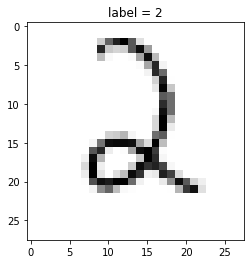

is classified as: [2]
conv layer:


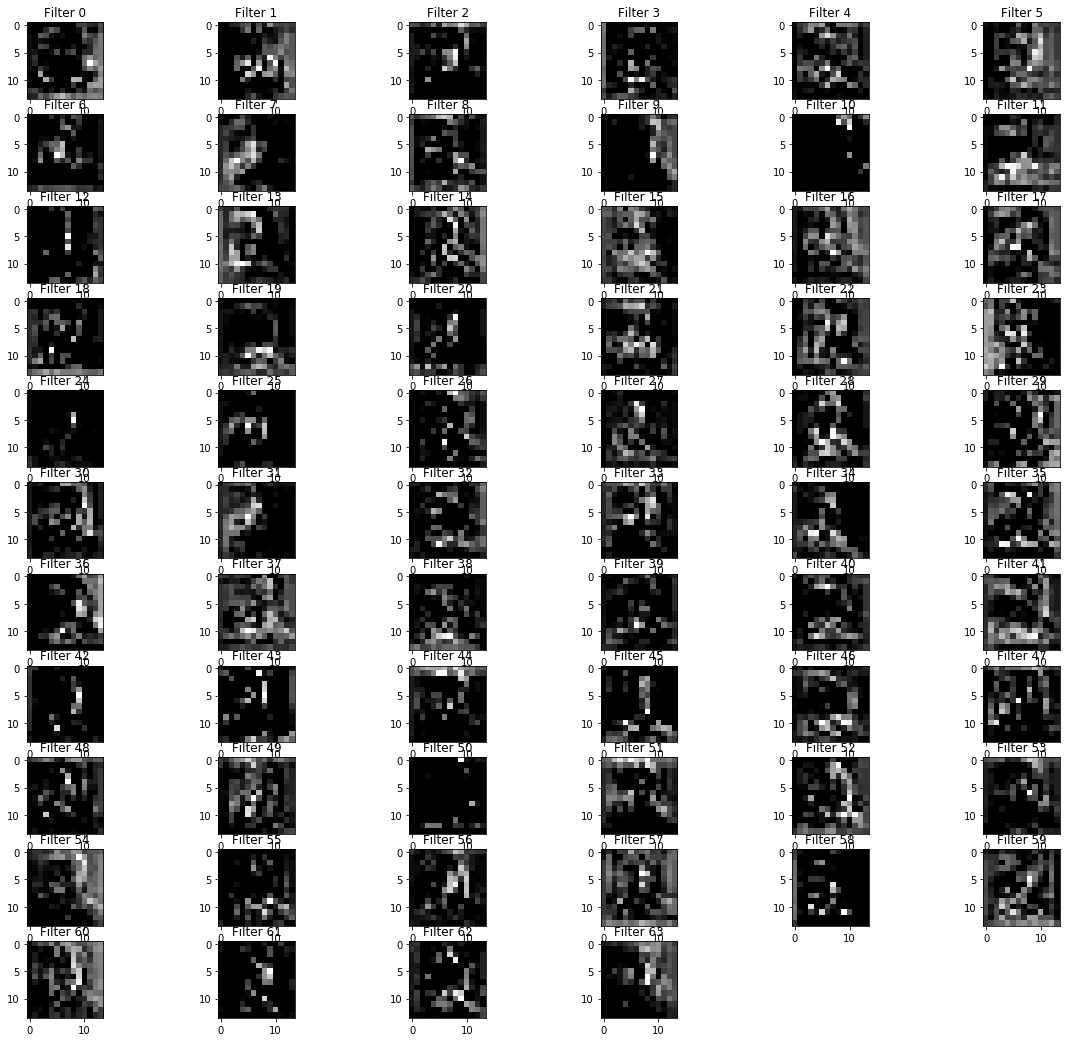

In [4]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(
tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_,
logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1001): # 20000
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={ x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    print('test accuracy %g' % accuracy.eval(feed_dict={ x: mnist.test.images, 
                                                        y_: mnist.test.labels, keep_prob: 1.0}))
    save_path = saver.save(sess, "my_models_tmp/model.ckpt")
    print("Model saved in file: %s" % save_path)
    saver.restore(sess, "my_models_tmp/model.ckpt")
    print("Model restored.")
    
    print('---------------------')
    print("Test sample:")
    
    #Get 28x28 image
    img_to_use = mnist.test.images[47]
    sample_1 = img_to_use.reshape(28,28)
    
    # Get corresponding integer label from one-hot encoded data
    sample_label_1 = np.where(mnist.test.labels[47] == 1)[0][0]
    
    # Plot sample
    plt.imshow(sample_1, cmap='Greys')
    plt.title('label = {}'.format(sample_label_1))
    plt.show()
    
    predicted_value = tf.argmax(y_conv, 1)
    print("is classified as: {}".format(predicted_value.eval(session= sess, 
                                                             feed_dict={x:img_to_use.reshape(1,784), 
                                                                        keep_prob: 1.0})))
    print("conv layer:")
    getActivations(h_conv2,img_to_use)